In [1]:
# Fix jpred and run everything again..
import os
import pandas as pd
import glob
from os import path

os.chdir('/Users/Sophia/Dundee')

In [2]:
# Function to save different versions of the same pdb's:

def check_file(filePath):
    if path.exists(filePath):
        numb = 1
        while True:
            newPath = "{0}_{2}{1}".format(*path.splitext(filePath) + (numb,))
            if path.exists(newPath):
                numb += 1
            else:
                return newPath
    return filePath

In [4]:
# Only difference with final is that jpred_final is taken from tuesday folder

os.chdir('/Users/Sophia/Dundee/dundee')
dir = os.listdir('final_data/prointvar_less')

for file in dir:
    pdb = file[:4]
    # print(pdb)
    try:
        df = pd.read_csv(f'final_data/prointvar_less/{file}')
        df = df.dropna()

        df_scop = pd.read_csv('final_data/Jpred/jpred_final.csv')
        df_scop = df_scop.dropna()

        df_scop['PDB_ID'] = df_scop['PDB_ID'].astype("string")

        df_trial = df_scop[df_scop['PDB_ID'].str.contains(f'{pdb}')]
        chain = df_trial.iloc[:, 2].str[5]
        chain_cap = chain.str.upper()


        df_chain = df.loc[df['PDB_dbChainId'].str.startswith(chain_cap.iloc[0])]

        filename = check_file('final_data/aligned/prointvar_col_chain/%s' % file)
        df_chain.to_csv('' + filename)


    # print(df_chain)

    except AttributeError:
        print(f'Not a string value apparently: {pdb}')
        continue
    except IsADirectoryError:
        print(f'Something wrong here: {pdb}')
        continue
    except IndexError:
        print(f'wtf: {pdb}')
    # except KeyError:
    #     print(f'Something wrong here: {pdb}')



wtf: 3wu2
wtf: 4v4e
Not a string value apparently: 2cho
Not a string value apparently: 1gci
Not a string value apparently: 2erl
Not a string value apparently: 2r75


In [5]:
# Ignoroe this
# # Do the same to JPred
os.chdir('/Users/Sophia/Dundee/dundee/tuesday')
# Sequence

data = pd.read_csv('jpred_final.csv')


pdb_id = []
for i,row in data.iterrows():
    pdb = row.iloc[1]
    pdb_id.append(pdb)
    scop = row.iloc[2]
        
    df_p = pd.DataFrame(pdb_id)

df_new = data['J_AA Sequence'].astype(str).apply(lambda x: pd.Series(list(x)))
df_new.dropna()

df_new['pdb_id'] = df_p
df_new
# print(df_new)


for i,row in df_new.iterrows():

    pdb_ID = row.iloc[-1]
    sh = row[:-1]
    sh = sh.dropna()
#     print(sh)
#     print(pdb_ID, sh)
#     sh.to_csv('/homes/2524591/data/JP_shift/J_seq/%s.csv' % pdb)
    file = check_file(f'data/J_seq/{pdb_ID}.csv')
    try:
        sh.to_csv('' + file)
    except ValueError:
        print('something wrong with: ' + pdb_id)

In [7]:
# Ignore
# # Do the same with predictions


import os
import pandas as pd
import numpy as np


# os.chdir('/cluster/gjb_lab/2524591/data')


data = pd.read_csv('jpred_final.csv')


# print(data)
pdb = []

for i,row in data.iterrows():
    pdb_id = row.iloc[1]
    
    pdb.append(pdb_id)
    
df_p = pd.DataFrame(pdb)

df_new = data['J_SS'].astype(str).apply(lambda x: pd.Series(list(x)))
df_new.dropna()

df_new['pdb_id'] = df_p
df_new


for i,row in df_new.iterrows():

    pdb_ID = row.iloc[-1]
#     print(pdb)
    sh = row[:-1]
#     sh.to_csv('/homes/2524591/data/shift_merged/J_ssPred_split/%s.csv' % pdb)

    file = check_file(f'data/J_ss/{pdb_ID}.csv')
    try:
        sh.to_csv('' + file)
    except ValueError:
        print('something wrong with: ' + pdb_id)




In [9]:
# IGnore
# # Merge Jpred prediction and ss

# os.chdir('/Users/Sophia/Dundee/dundee/data')
os.chdir('/Users/Sophia/Dundee/dundee/tuesday/data')

dir = os.listdir('J_seq')

# data = pd.read_csv('merged_w_AF/1rg8.csv')
# print(data)

for file in dir:
    try:
        df = pd.read_csv('J_seq/%s' % file)
        df_1 = pd.read_csv('J_ss/%s' % file)

        df_2 = pd.concat([df, df_1], axis=1)
        df_2 = df_2.iloc[:, [1, 3]]

        df_2.to_csv('JP/%s' % file)
    except IsADirectoryError:
        print(f'Invalid data: {file}')

In [10]:
# JPred files merged with AF_Pro

# os.chdir('/homes/2524591/data')

# os.chdir('/Users/Sophia/Dundee/tuesday/data')
import os
import pandas as pd
import numpy as np
import re

# dir = os.listdir('/homes/2524591/data/AF_Pro')
# os.chdir('/Users/Sophia/Dundee/dundee/data')

dir = os.listdir('/Users/Sophia/Dundee/dundee/data/AF_Pro')


for file in dir:
    try:
        df = pd.read_csv('/Users/Sophia/Dundee/dundee/data/AF_Pro/' + file)
        pdb = file[:4]
        
        file_af = check_file(f'/Users/Sophia/Dundee/dundee/tuesday/data/Pro_final/{pdb}.csv')

        df_j = pd.read_csv('/Users/Sophia/Dundee/dundee/tuesday/data/JP/%s.csv' % pdb)
        df_j = df_j.dropna()
        j_sel= df_j.iloc[:, 1]
        tsp = j_sel.iloc[0]
        df['Jpred_seq'] = j_sel  


        j_ss = df_j.iloc[:, 2]
        hm = j_ss.iloc[0]
        df['Jpred_SS_pred'] = j_ss

        # 

        df = df.replace('-', 'C', regex=True)


#     Uncomment to save
        df.to_csv(file_af) 

        # If there are multiple copies:
        if os.path.exists(f'JP/{pdb}_1.csv'):
            file = check_file(f'JP/{pdb}.csv')
            x = file[-5]
            z = int(x)
            for i in range(1, z): #len(x)??
                try:                   
                    df_j = pd.read_csv(f'JP/{pdb}_{i}.csv')
                    df_j.dropna()
                    j_sel= df_j.iloc[:, 1]
                    tsp = j_sel.iloc[0]
                    df['Jpred_seq'] = j_sel
                                        
                    j_ss = df_j.iloc[:, 2]
                    hm = j_ss.iloc[0]
                    df['Jpred_SS_pred'] = j_ss
                    df = df.replace('-', 'C', regex=True) 
                    
                    filee = check_file(f'/Users/Sophia/Dundee/dundee/tuesday/data/Pro_final/{pdb}.csv')
#                     Uncomment to save -- but if run multiple times, will save the same file with diff. name
                    df.to_csv(filee)
                except FileNotFoundError:
                    print(f'Something wrong with: {pdb}')
                    continue
                    
     
    except FileNotFoundError:
        print(f'{pdb} not found')
        continue
    except IsADirectoryError:
        print(f'Invalid data: {pdb}')
        continue
     



3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
4v4e not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found
3wu2 not found


In [5]:
# Look at number of files
import glob
os.chdir('/Users/Sophia/Dundee/dundee/final_data')
# JPred
x = glob.glob('Jpred/J_ss/*.csv')
x_1 = glob.glob('Jpred/J_seq/*.csv')
y = glob.glob('Jpred/JP/*.csv')

# AF with ProIntVar
# y_1 = glob.glob('AF_Pro/*.csv')


z_2 = glob.glob('aligned/Pro_final/*.csv')


print(len(x),len(x_1))
print(len(y))

# print(len(y_1))
print(len(z_2))

1348 1348
1348
1540


In [6]:
# Map from SCOPe to PDB

# First find how many don't match at the beginning

os.chdir('/Users/Sophia/Dundee/dundee/final_data/aligned/Pro_final')


x = glob.glob('*.csv')
a_1 = []
a_2 = []
b = 0
c = 0
d = 0


for file in x:
    pdb = file[:-4]
    df = pd.read_csv(file)

    # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])
    # print(df['Jpred_seq'].iloc[:1], pdb)

    # Check if first letter matches
    if (df['Jpred_seq'].iloc[:1] == df['UniProt_dbResName'].iloc[:1]).all() == True:
        # df = df.dropna(axis=0, subset=['Jpred_SS_pred'])
        b += 1
        a_1.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/final_data/aligned/check_scop/{pdb}.csv')
    else:
        d += 1
        a_2.append(pdb)
        df.to_csv(f'/Users/Sophia/Dundee/dundee/final_data/aligned/jp_align/{pdb}.csv')


print(b)
print(d)

# 549 need mapping from SCOPe to PDB


1056
484


In [17]:
# Assert that UniProt and Jpred sequences match with true sequence



# No shifting SCOPe
os.chdir('/Users/Sophia/Dundee/dundee/final_data/aligned/check_scop')


x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1
        df.to_csv('/Users/Sophia/Dundee/dundee/final_data/aligned/match_1/%s' % file)
    # else:

        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/tuesday/data/unmatched_1/%s' % file)

print(b)
    

727


In [18]:
# Unique pdb's
os.chdir('/Users/Sophia/Dundee/dundee/final_data/aligned/match_1')

x = glob.glob('*.csv')
pdb_id = []
for file in x:
    pdb = file[:4]
    pdb_id.append(pdb)

print(len(pdb_id))
df = pd.DataFrame(pdb_id)
df = df.drop_duplicates()
print(len(df))

727
511


In [10]:
# Write code to align all files

os.chdir('/Users/Sophia/Dundee/dundee/final_data/aligned/jp_align')

x = glob.glob('*.csv')
d = 0
e = 0
f = 0
g = 0
l = 0
hm = []

for file in x:
    df = pd.read_csv('/Users/Sophia/Dundee/dundee/final_data/aligned/Pro_final/%s' % file)
    mask = ~(df.columns.isin(['Jpred_seq','Jpred_SS_pred']))

    cols_to_shift = df.columns[mask]



    for i in range(len(df)):
        pdb = file[:4]

        if df.iloc[0]['Jpred_seq'] != df.iloc[0]['UniProt_dbResName']:
            e += 1
            # Ignore this line
            # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
            df[cols_to_shift]= df.loc[:,mask].shift(-1)
        else:
            if df.iloc[1]['Jpred_seq'] != df.iloc[1]['UniProt_dbResName']:
                f += 1
                df[cols_to_shift]= df.loc[:,mask].shift(-1)
                # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
            else:
                if df.iloc[2]['Jpred_seq'] != df.iloc[2]['UniProt_dbResName']:
                    g += 1
                    # df['UniProt_dbResName'] = df['UniProt_dbResName'].shift(-1)
                    df[cols_to_shift]= df.loc[:,mask].shift(-1)

                # Try doing one more and the difference in numbers - should have 5 more
                else:
                    # break
                    if df.iloc[3]['Jpred_seq'] != df.iloc[3]['UniProt_dbResName']:
                    # g += 1

                        df[cols_to_shift]= df.loc[:,mask].shift(-1)
                    else:
                        break

    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and len(df) > 0:
        l += 1
        df.to_csv('/Users/Sophia/Dundee/dundee/final_data/aligned/4/%s' % file)

    else:
        hm.append(pdb)
        if len(df) == 0:
            df.to_csv('/Users/Sophia/Dundee/dundee/final_data/aligned/4_empty/%s' % file)
        else:
            df.to_csv('/Users/Sophia/Dundee/dundee/final_data/aligned/4_unmatched/%s' % file)



lol = pd.DataFrame(hm)
print(l)


print(len(lol))

159
325


In [35]:
# Unique pdb's
os.chdir('/Users/Sophia/Dundee/dundee/final_data/aligned/match_2')
# os.chdir('/Users/Sophia/Dundee/dundee/try_2')

x = glob.glob('*.csv')
pdb_id = []
for file in x:
    pdb = file[:4]
    pdb_id.append(pdb)

print(len(pdb_id))
df = pd.DataFrame(pdb_id)
df = df.drop_duplicates()
print(len(df))

130
115


In [84]:
# See how many match - with 4 residues matched

os.chdir('/Users/Sophia/Dundee/tuesday')

# x = glob.glob('trial_empty/*.csv')
# y = glob.glob('trial_4/*.csv')
y = glob.glob('data/match_2/*.csv')
z = glob.glob('data/unmatched_2/*.csv')

z_1 = glob.glob('data/4_unmatched/*.csv')
z_2 = glob.glob('data/4_empty/*.csv')


# print(len(x))
print(len(y))
print(len(z))


print(len(z_1))
print(len(z_2))

861
25
27
298


In [85]:
# Take the not empty - 27 and remove some rows


os.chdir('/Users/Sophia/Dundee/final_data/aligned/unmatched_2')

x = glob.glob('*.csv')
a = 0
h = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])
    # print(df)

    df2 = df[df.Jpred_seq == df.UniProt_dbResName]

    if (len(df) - len(df2) < 5):
        h += 1
        # df2.to_csv('/Users/Sophia/Dundee/tuesday/data/rem/%s' % file)
        if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
            a += 1
            df2.to_csv('/Users/Sophia/Dundee/final_data/aligned/rem_match/%s' % file)


print(h)
print(a)

# Ok, no difference

25
0


In [86]:
os.chdir('/Users/Sophia/Dundee/final_data/aligned/4_empty')

hm = []
a = 0
b = 0

z = glob.glob('*.csv')

for file in z:
    df = pd.read_csv('/Users/Sophia/Dundee/final_data/aligned/Pro_final/%s' % file)

    for i in range(len(df)):

        if df.iloc[0]['Jpred_seq'] != df.iloc[0]['UniProt_dbResName']:
            df['Jpred_seq'] = df['Jpred_seq'].shift(-1)
            # Need to also shift prediction!!!!
            df['Jpred_SS_pred'] = df['Jpred_SS_pred'].shift(-1)
        else:
            break


    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])
    #     break
    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and len(df) > 0:
        a += 1
        df.to_csv('/Users/Sophia/Dundee/final_data/aligned/jp_shifted/%s' % file)
    else:
        # print(df)
        b += 1
        df.to_csv('/Users/Sophia/Dundee/final_data/aligned/jp_fix/%s' % file)

        
print(a)
print(b)

80
218


In [11]:
# Check matches
#
os.chdir('/Users/Sophia/Dundee/tuesday/data/jp_shifted')
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/final?')
# got final? from putting bfr+4+rem_match with jp_shift

# Remove a few rows
# os.chdir('/Users/Sophia/Dundee/dundee/data/monday/total')

x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1

        # kleo
        df.to_csv('/Users/Sophia/Dundee/final_data/aligned/match_3/%s' % file)
    else:


        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/final_data/aligned/unmatched_3/%s' % file)

print(b)

# Matched are cumulative, unmatched are not

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Sophia/Dundee/tuesday/data/jp_shifted'

In [ ]:
# Unique pdb's
os.chdir('/Users/Sophia/Dundee/tuesday/data/match_3')

x = glob.glob('*.csv')
pdb_id = []
for file in x:
    pdb = file[:4]
    pdb_id.append(pdb)

print(len(pdb_id))
df = pd.DataFrame(pdb_id)
df = df.drop_duplicates()
print(len(df))

932
678


In [93]:
# Remove up to 2 rows from jp_fix

os.chdir('/Users/Sophia/Dundee/tuesday/data/jp_fix')

x = glob.glob('*.csv')
h = 0
for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset=['UniProt_dbResName'])
    # print(df)

    df2 = df[df.Jpred_seq == df.UniProt_dbResName]

    if (len(df) - len(df2) < 3):
        h += 1
        df2.to_csv('/Users/Sophia/Dundee/tuesday/data/fix_rem/%s' % file)


print(h)

0


In [94]:
# Check matches
#
os.chdir('/Users/Sophia/Dundee/tuesday/data/fix_rem')

x = glob.glob('*.csv')
b = 0

for file in x:
    df = pd.read_csv(file)

    df = df.dropna(axis=0, subset=['AF_predictions'])
    df = df.dropna(axis=0, subset=['Jpred_seq'])
    df = df.dropna(axis=0, subset = ['SS_CLASS'])

    if (df['Jpred_seq'] == df['UniProt_dbResName']).all() == True and (df['shifted Uni'] == df['UniProt_dbResName']).all() == True:
        b += 1

        # kleo
        df.to_csv('/Users/Sophia/Dundee/tuesday/data/match_4/%s' % file)
    else:


        # First 4 residues + previous, unmatched
        df.to_csv('/Users/Sophia/Dundee/tuesday/data/unmatched_4/%s' % file)

print(b)

# Matched are cumulative, unmatched are not

21


In [96]:
# Unique pdb's
os.chdir('/Users/Sophia/Dundee/tuesday/data/match_4')

x = glob.glob('*.csv')
pdb_id = []
for file in x:
    pdb = file[:4]
    pdb_id.append(pdb)

print(len(pdb_id))
df = pd.DataFrame(pdb_id)
df = df.drop_duplicates()
print(len(df))

953
686


In [100]:
os.chdir('/Users/Sophia/Dundee/tuesday/data/match_4') 

x = glob.glob('*.csv')


n_1 = 0
n_2 = 0
n_3 = 0

af_list_1 = []
jp_list_1 = []

af_list_2 = []
jp_list_2 = []

af_list_3 = []
jp_list_3 = []
pdbid = []
comp = []



for file in x:
    pdb_id = file[:-4]
    pdbid.append(pdb_id)
    df = pd.read_csv('%s' % file)
    af = df['AF_predictions']
    jp = df['Jpred_SS_pred']
    true = df['SS_CLASS']
    
    comp.append((df['SS_CLASS'].value_counts(normalize=True) * 100).round(1))

    
#     # Accuracy
    af_acc = accuracy_score(true, af)
    af_list_1.append(af_acc)
    jp_acc = accuracy_score(true, jp)
    jp_list_1.append(jp_acc)
    

pdb_id = pd.DataFrame(pdbid)
df_af_acc = pd.DataFrame(af_list_1)
df_jp_acc = pd.DataFrame(jp_list_1)

In [101]:
# Final one

n_1 = 0
n_2 = 0
n_3 = 0

af_list_1 = []
jp_list_1 = []

af_list_2 = []
jp_list_2 = []

af_list_3 = []
jp_list_3 = []

af_list_4 = []
jp_list_4 = []

af_m_1 = []
jp_m_1 = []

af_s_1 = []
jp_s_1 = []
pdbid = []
comp = []

for file in x:
    pdb_id = file[:-4]
    pdbid.append(pdb_id)
    df = pd.read_csv('%s' % file)
    af = df['AF_predictions']
    jp = df['Jpred_SS_pred']
    true = df['SS_CLASS']
    
    comp.append((df['SS_CLASS'].value_counts(normalize=True) * 100).round(1))

    
#     # Accuracy
    af_acc = accuracy_score(true, af)
    af_list_1.append(af_acc)
    jp_acc = accuracy_score(true, jp)
    jp_list_1.append(jp_acc)
    
    # Precision        
    af_pr = precision_score(true, af, average = 'weighted')
    af_list_2.append(af_pr)
    jp_pr = precision_score(true, jp, average = 'weighted')
    jp_list_2.append(jp_pr)
    
    
    # Recall/Sensitivity/True Positive Rate
    af_rec = recall_score(true, af, average = 'weighted')
    af_list_3.append(af_rec)
    jp_rec = recall_score(true, jp, average = 'weighted')
    jp_list_3.append(jp_rec)
    
    
    # F1 - harmonic mean of precision and recall   
    af_f1 = f1_score(true, af, average = 'weighted')
    af_list_4.append(af_f1)
    jp_f1 = f1_score(true, jp, average = 'weighted')
    jp_list_4.append(jp_f1)
    
    # Matthews Correlation Coefficient
    af_m = matthews_corrcoef(true, af)
    af_m_1.append(af_m)
    jp_m = matthews_corrcoef(true, jp)
    jp_m_1.append(jp_m)

pdb_id = pd.DataFrame(pdbid)
df_af_acc = pd.DataFrame(af_list_1)
df_jp_acc = pd.DataFrame(jp_list_1)
    
    
df_af_pr = pd.DataFrame(af_list_2)
df_jp_pr = pd.DataFrame(jp_list_2)


df_af_rec = pd.DataFrame(af_list_3)
df_jp_rec = pd.DataFrame(jp_list_3)
    
    
df_af_f1 = pd.DataFrame(af_list_4)
df_jp_f1 = pd.DataFrame(jp_list_4)

df_af_m = pd.DataFrame(af_m_1)
df_jp_m = pd.DataFrame(jp_m_1)



acc_af_avg = pd.DataFrame(df_af_acc.mean()).round(3)
acc_jp_avg = pd.DataFrame(df_jp_acc.mean()).round(3)

pr_af_avg = pd.DataFrame(df_af_pr.mean()).round(3)
pr_jp_avg = pd.DataFrame(df_jp_pr.mean()).round(3)

rec_af_avg = pd.DataFrame(df_af_rec.mean()).round(3)
rec_jp_avg = pd.DataFrame(df_jp_rec.mean()).round(3)

f1_af_avg = pd.DataFrame(df_af_f1.mean()).round(3)
f1_jp_avg = pd.DataFrame(df_jp_f1.mean()).round(3)

m_af_avg = pd.DataFrame(df_af_m.mean()).round(3)
m_jp_avg = pd.DataFrame(df_jp_m.mean()).round(3)

# s_af_avg = pd.DataFrame(df_af_s.mean())
# s_jp_avg = pd.DataFrame(df_jp_s.mean())


acc = pd.concat([acc_af_avg, acc_jp_avg])
pr = pd.concat([pr_af_avg, pr_jp_avg])
rec = pd.concat([rec_af_avg, rec_jp_avg])
f1 = pd.concat([f1_af_avg, f1_jp_avg])
m = pd.concat([m_af_avg, m_jp_avg])

/Users/Sophia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Sophia/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
df = pd.concat([acc, pr, rec, f1, m], axis = 1)
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'Matthews Correlation Coefficient']

df.index = ['AF', 'JP']

df

,Accuracy,Precision,Recall,F1 score,Matthews Correlation Coefficient
AF,0.959,0.709,0.707,0.707,0.679
JP,0.835,0.625,0.615,0.615,0.514


In [114]:
# Calculate averages over each pdb and then average again -- divide between C, E, H

import os
import glob
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from scipy import stats

# os.chdir('/homes/2524591/data/JP_shift/exact_match')
os.chdir('/Users/Sophia/Dundee/tuesday/data/match_4')
x = glob.glob('*.csv')

n_1 = 0
n_2 = 0
n_3 = 0

n_4 = 0
n_5 = 0
n_6 = 0


af_mcm_acc = []
jp_mcm_acc = []



for file in x:
    df = pd.read_csv('%s' % file)
    af = df['AF_predictions']
    jp = df['Jpred_SS_pred']
    true = df['SS_CLASS']
    
#     AF
    mcm_af = multilabel_confusion_matrix(true, af, labels=["C", "E", "H"])
    

    tn_af = mcm_af[:, 0, 0]
    tp_af = mcm_af[:, 1, 1]
    fn_af = mcm_af[:, 1, 0]
    fp_af = mcm_af[:, 0, 1]
    
#     print(mcm_af, file, '\n', tn_af, tp_af, fn_af, fp_af)
    
    
    accuracy_af = (tp_af+tn_af) / (tn_af+tp_af+fn_af+fp_af)
    
    af_mcm_acc.append(accuracy_af)
    
    # JP
    mcm_jp = multilabel_confusion_matrix(true, jp, labels=["C", "E", "H"])
        
    tn_jp = mcm_jp[:, 0, 0]
    tp_jp = mcm_jp[:, 1, 1]
    fn_jp = mcm_jp[:, 1, 0]
    fp_jp = mcm_jp[:, 0, 1]
    
    accuracy_jp = (tp_jp+tn_jp) / (tn_jp+tp_jp+fn_jp+fp_jp)

    
#     print(accuracy_af, file)

    jp_mcm_acc.append(accuracy_jp)


df_af_acc_m = pd.DataFrame(af_mcm_acc)
df_jp_acc_m = pd.DataFrame(jp_mcm_acc)



df_af_acc_m.columns = ['C', 'E', 'H']
df_jp_acc_m.columns = ['C', 'E', 'H']


df_af_acc_m.loc[len(df_af_acc_m)]= [df_af_acc_m.iloc[:, 0].mean(), df_af_acc_m.iloc[:, 1].mean() , df_af_acc_m.iloc[:, 2].mean()]
df_jp_acc_m.loc[len(df_jp_acc_m)]= [df_jp_acc_m.iloc[:, 0].mean(), df_jp_acc_m.iloc[:, 1].mean() , df_jp_acc_m.iloc[:, 2].mean()]



# Last row is average
df_jp_acc_m = df_jp_acc_m.iloc[-1:]
df_af_acc_m = df_af_acc_m.iloc[-1:]

df_jp_acc_m = pd.DataFrame(df_jp_acc_m).round(3)
df_af_acc_m = pd.DataFrame(df_af_acc_m).round(3)

# print('JP', df_jp_acc_m)
# print('AF', df_af_acc_m)
df_jp_acc_m
df_af_acc_m

,C,E,H
953,0.959,0.985,0.975


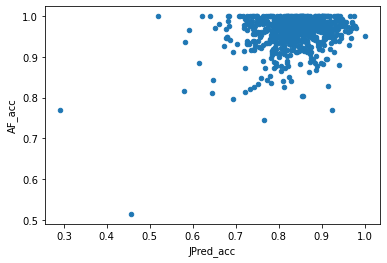

In [98]:
# Check plot
x = glob.glob('*.csv')


n_1 = 0
n_2 = 0
n_3 = 0
merged = pd.concat([pdb_id, df_af_acc, df_jp_acc], axis=1)
merged.columns = ['PDB_ID', 'AF_acc', 'JPred_acc']


x = merged.plot.scatter(x='JPred_acc', y='AF_acc')

# hvplot.save(x, '/homes/2524591/test_860.html')

x